## Import the Dependencies

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data Collection and Processing

In [7]:
# loading the data from csv to pandas dataframe
car_dataset = pd.read_csv('car_dataset.csv')

In [9]:
# Inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
# Checking the number of rows and columns
car_dataset.shape

(301, 9)

In [12]:
# getting information of dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
# checking number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [56]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


 ## Encoding the Categorical data

In [16]:
#encoding "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding "Seller_Type" column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [22]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting the data and Target

In [25]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']  #target

In [26]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [27]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## Spliting Training and Test data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.1, random_state=2)

## Model Training
### 1. Linear Regression

In [31]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [32]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [34]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

##  R squard error

In [39]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R squared Error:', error_score)

R squared Error: 0.8799451660493698


## Visualize the actual and predicted prices

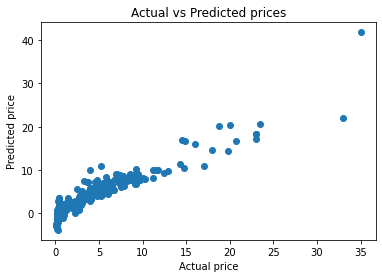

In [40]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()

In [42]:
# prediction on training data
test_data_prediction = lin_reg_model.predict(X_test)

In [43]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared Error:', error_score)

R squared Error: 0.8365766715026903


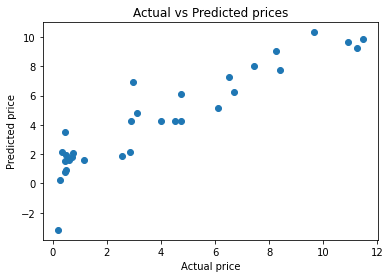

In [44]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()

### 2. Lasso Regression

In [46]:
# loading the Lasso regression model
lass_reg_model = Lasso()

In [47]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

## Model Evaluation

In [49]:
# prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

## R squard error

In [50]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R squared Error:', error_score)

R squared Error: 0.8427856123435794


## Visualize the actual and predicted prices

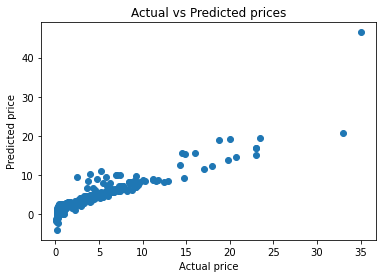

In [51]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()

In [52]:
# prediction on training data
test_data_prediction = lass_reg_model.predict(X_test)

In [53]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared Error:', error_score)

R squared Error: 0.8709167941173195


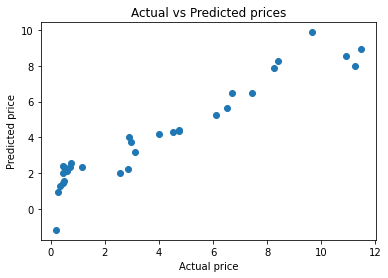

In [54]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()